In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

np.random.seed(111)

In [4]:
def Monte_Carlo_PI(n): #n - number of points to draw
    def boundry_values(x):
        return np.sqrt(1-x*x)
    #n - number of points to draw
    x=np.random.uniform(0,1,n)
    y=np.random.uniform(0,1,n)
    #try different sampling methods?
    within=y<boundry_values(x)
    pi=4*sum(within)/n
    return [pi,x,y,within]

In [5]:
def Scatter_Plot_Monte_carlo(x,y,points_within):
    plt.scatter(x[points_within], y[points_within], color='purple', label='Within Area',s=2)
    plt.scatter(x[~points_within], y[~points_within], color='yellow', label='Outside Area',s=2)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Monte Carlo Simulation for π Estimation')
    plt.legend()
    plt.show()

In [7]:
def Perform_Simulations(N,n): #N - amount of simulations #n - amount of smaples in each simulation
    #columns- each simulation
    #index is number of samples. each value is essentaily a pi estimate in each simulation in with <index. amount of samples
    pi_estimate_array = pd.DataFrame(index=range(n), columns=range(N), dtype=float)
    pi_estimate_array.fillna(0, inplace=True)
    for i in range(0,N):
        for j in range(1,n+1):
            pi_estimate_array.loc[j-1,i]=Monte_Carlo_PI(j+1)[0]
    # print(pi_estimate_array)
    return pi_estimate_array

In [8]:
def plot_pi_dataframe(dataframe):
    plt.plot(dataframe, color='blue', alpha=0.1, linewidth=0.5)
    plt.axhline(y=np.pi, color='r', linestyle='-',label='Pi Value')
    plt.xlabel('Number of Samples')
    plt.ylabel('Pi Estimate')
    plt.title('Monte Carlo Simulation for π Estimation')
    plt.show()

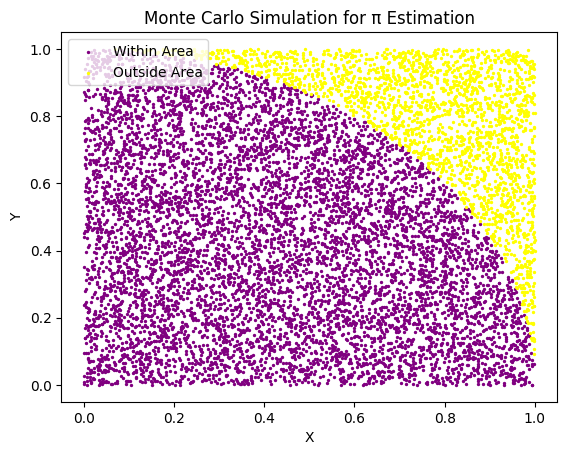

Compilation time: 0.4551689624786377 seconds.
Pi estimate value: 3.1164


In [9]:
start_time=time.time()
[pi,x,y,points_within]=Monte_Carlo_PI(10000)
Scatter_Plot_Monte_carlo(x,y,points_within)
end_time=time.time()
print(f"Compilation time: {end_time-start_time} seconds.")
print(f'Pi estimate value: {pi}')

In [10]:
pi_estimate_array=Perform_Simulations(20,10000)

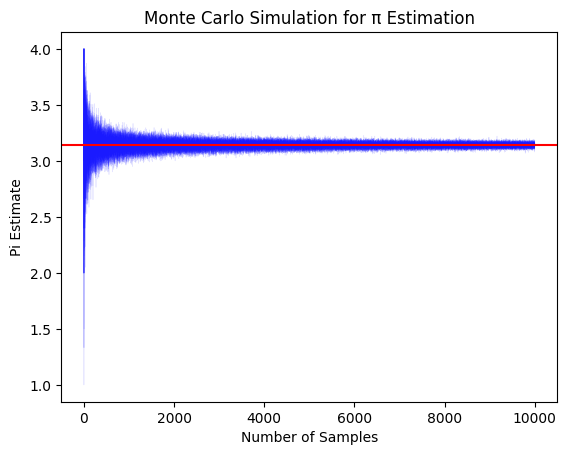

In [11]:
plot_pi_dataframe(pi_estimate_array)

In [14]:
box_plots=Perform_Simulations(10,100)

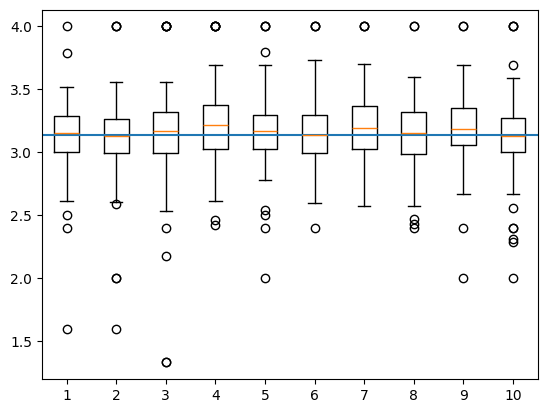

In [16]:
plt.boxplot(box_plots)
plt.axhline(np.pi)
plt.show()